<a href="https://colab.research.google.com/github/zuyaas/data-visualization/blob/main/lib_data_project1_VISITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Important: SAVE YOUR OUTPUTS from right corner everytime before runing new data. otherwise will rewrite your last outputs.
# Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
np.set_printoptions(suppress=True)

In [ ]:
df = pd.read_csv("Pupld13a.csv", encoding = 'ISO-8859-1', low_memory=False)

In [ ]:
# Filter example
columns = ["POPU_LSA","TOTSTAFF","TOTINCM","TOTOPEXP","HRS_OPEN","REGBOR","VISITS"]
df_new = df[columns]
df_new = df_new[df_new>=0].dropna(axis=0, how='any')
df_new.head()

,POPU_LSA,TOTSTAFF,TOTINCM,TOTOPEXP,HRS_OPEN,REGBOR,VISITS
0,2041.0,0.68,33795.0,21598.0,1404.0,480.0,9371.0
1,301134.0,85.00,9980568.0,10836356.0,10608.0,102056.0,804323.0
2,235.0,0.60,14513.0,14514.0,600.0,120.0,1050.0
3,6278.0,3.25,263569.0,266545.0,2652.0,1219.0,31226.0
4,13293.0,3.00,325209.0,321208.0,2548.0,2720.0,43267.0


In [ ]:
# Correlation matrix
df_new.corr().style.background_gradient(cmap='BrBG')


,POPU_LSA,TOTSTAFF,TOTINCM,TOTOPEXP,HRS_OPEN,REGBOR,VISITS
POPU_LSA,1,0.868741,0.852304,0.851935,0.880162,0.890303,0.900394
TOTSTAFF,0.868741,1,0.974711,0.970313,0.922463,0.899201,0.955385
TOTINCM,0.852304,0.974711,1,0.994169,0.896036,0.87944,0.952933
TOTOPEXP,0.851935,0.970313,0.994169,1,0.886725,0.876457,0.947189
HRS_OPEN,0.880162,0.922463,0.896036,0.886725,1,0.890716,0.923534
REGBOR,0.890303,0.899201,0.87944,0.876457,0.890716,1,0.910323
VISITS,0.900394,0.955385,0.952933,0.947189,0.923534,0.910323,1


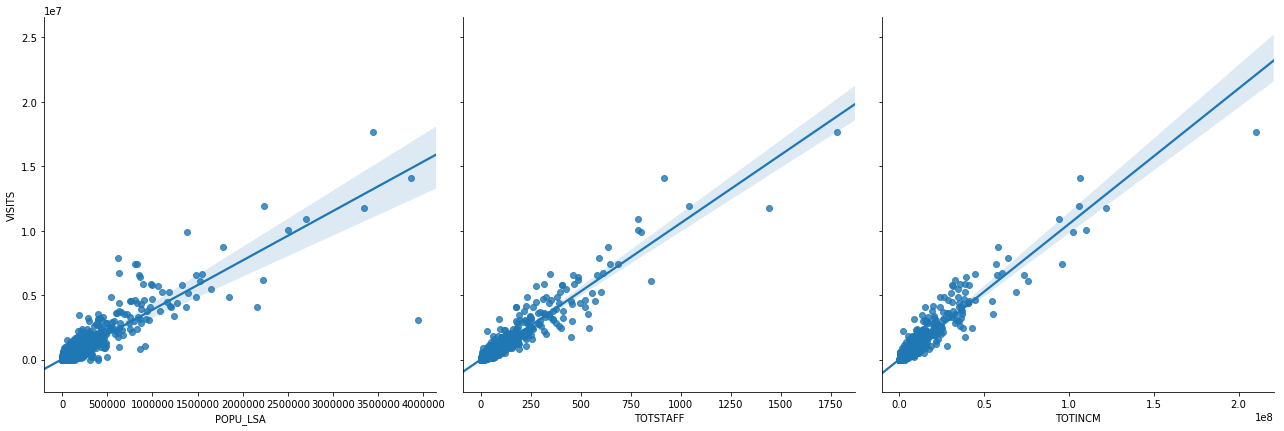

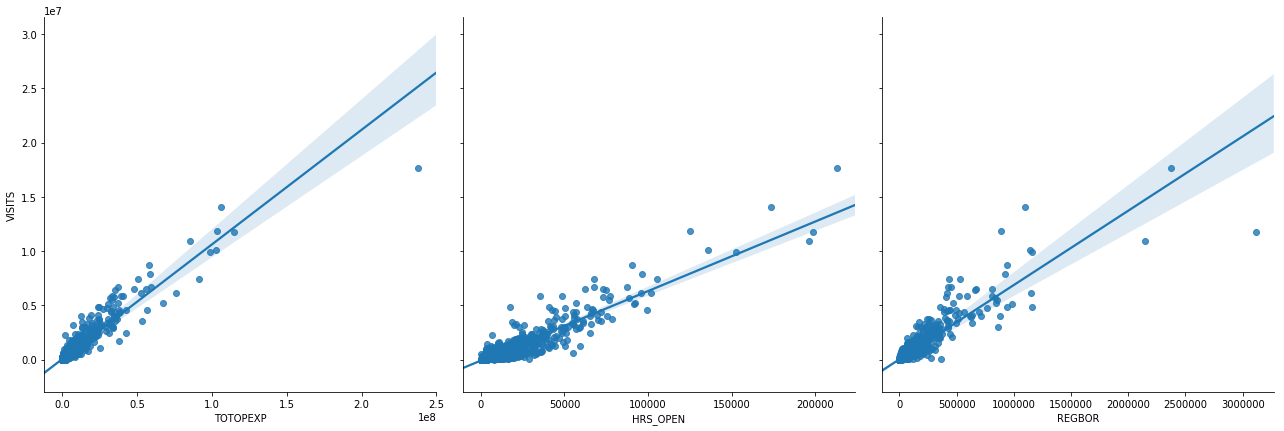

In [ ]:
# Pairplot
ax1 = sns.pairplot(df_new, x_vars=["POPU_LSA","TOTSTAFF","TOTINCM"], y_vars="VISITS", height=6, aspect=1, kind='reg')
ax2 = sns.pairplot(df_new, x_vars=["TOTOPEXP","HRS_OPEN","REGBOR"], y_vars="VISITS", height=6, aspect=1, kind='reg')
plt.show()

ax1.savefig("Figure_1.png")
ax2.savefig("Figure_2.png")

In [ ]:
# Training and Testing model

x = df_new[["POPU_LSA","TOTSTAFF","TOTINCM","TOTOPEXP","HRS_OPEN","REGBOR"]]
y = df_new[["VISITS"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.score(x_test, y_test)

0.9389248383176608

In [ ]:
model.coef_

array([[  0.63192223, 405.75416692,   0.02510034,   0.03985967,
         10.29012686,   0.90761688]])

In [ ]:
model.intercept_

array([-5704.18328636])

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 21109472090.13


In [ ]:
print('R-squared: %.2f' % r2_score(y_test, y_pred))

R-squared: 0.94


In [ ]:
with open("results_VISITS.txt", "wt") as f:
    print("Results: \n", "model score:", model.score(x_test, y_test),"\n",
          "Coef: ", model.coef_, "\n",
          "Model intercept: ", model.intercept_, "\n",
          "Mean squared error: %.2f " % mean_squared_error(y_test, y_pred), "\n",
          "R-squared: %.2f " % r2_score(y_test, y_pred), file=f)